# Homework 8:  MPCS 51042-1 2018
## Due Fri, Dec 7, 11:59 PM

## Directions

Complete your code in this Jupyter notebook.  Each question has a blank cell where you should put the code for your solution.  Upload your completed notebook to the repo along with the data files:
* `hw08/`
  * `Homework 8.ipynb`
  * `hw8_data/`
    * `Seattle2014.csv`
    * `Speed_Camera_Violations.csv`
    * `titanic.csv`
    * `titanic_raw.csv`

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [32]:
# taken from class notes to easily display data
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

# Problem 1

In the next few problems, we'll take a look at the crew manifest of the RMS Titanic, a famously-large passenger ship that sank in the North Atlantic Ocean on April 15, 1912. 

First, suppose we are only given the passengers' names, including an honorific ("Mr.", "Mrs.", "Miss", etc.), and we want to infer their sexes.  

**Part A:** Consider the dataset `hw8_data/titanic_raw.csv`.  **From the "name" column, use Pandas vectorized string operations to assign each passenger a sex ("male" or "female"), based only on their honorifics.  Include this data in your DataFrame as a new column called "sex", and display the resulting DataFrame.**   

In a comment, state what assumptions you've made (for example, are you assuming that a Colonel is a "male"?).  You may also choose to ignore ambiguous entries, marking their sex as `None`. 

(The implicit biases of a data scientist or machine learning algorithm are significant topics of debate.  However, for this assignment, I promise we will not personally judge your assumptions about gender roles in the year 1912.)

In [33]:
# Code your answer here
titanic = pd.read_csv('hw8_data/titanic_raw.csv') 

females = pd.Series(titanic['name'].str.split(', ').str.get(-1).str.split('.').str.get(0)).isin(['Mrs', 'Miss', 'Mme', 'Ms', 'Lady', 'Mlle', 'the Countess'])
# males, by default, have honorifics of Mr., Master., Don., Rev., Dr., Major., Sir., Col., Capt., and Jonkheer
titanic['sex'] = 'male'
titanic.loc[females,'sex'] = 'female'

display('titanic')



,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,S,NaN,male
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,female
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.925,S,NaN,female
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1,C123,S,female
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.05,S,NaN,male
5,0,3,"Moran, Mr. James",0.0,0,330877,8.4583,Q,NaN,NaN,male
6,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,male
7,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.075,S,NaN,male
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,S,NaN,female
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,C,NaN,female


**Part B:** The dataset `hw8_data/titanic.csv` is cleaned and annotated with sex, as determined by the developers of `seaborn` using an unknown method.  **Compare your inferred passengers sexes to those of the cleaned `seaborn` dataset.  Report your total percentage of matched entries.**  

If you marked any entries with a `None` sex, those are considered mismatches with either sex.

(Optional: Display the mismatched entries, too.)

In [34]:
# Code your answer here
titanic_clean = pd.read_csv('hw8_data/titanic.csv')

# matched
matched = titanic.merge(titanic_clean, on=['name', 'sex'], how='inner') # titanic_clean varies a lot in values compared to titanic, so decided to only merge on a few
print("Total percentage of matched entries = {}%".format(matched.index.size/titanic.index.size*100))
matched['flag'] = 1
# display("matched[['name','sex']]")

# not_matched
mismatched = matched.merge(titanic, on=['name', 'sex'], how='outer')
mismatched = (mismatched[mismatched.flag != 1])
display("mismatched[['name','sex']]")


Total percentage of matched entries = 99.88776655443323%


,name,sex
890,"Leader, Dr. Alice (Farnham)",male


# Problem 2

The dataset `hw8_data/titanic.csv` also contains the price of each passenger's ticket, reported in 1912 British pounds sterling.  A quick (possibly non-authoritative) Google search shows that 1 Pound in 1912 would be worth 110.94 Pounds today, after adjusting for inflation.  Today, 1 British Pound is worth \$1.28 in American dollars.

**Part A:** Consider the "fare" column and the "pclass" column in the dataset.  **Show a DataFrame with the average ticket price for each class in 2018 dollars**.  

In [35]:
# Code your answer here
avg_fare = round(titanic_clean.groupby('pclass')[['fare']].mean()*110.94*1.28, 2)
display('avg_fare')

,fare
pclass,
1,11950.23
2,2934.10
3,1941.97


**Part B:** Using Expedia.com, I was able to get these fares for a flight from Southhampton to NYC (the same route as the Titanic) on April 15, 2019:
* Economy: \$512
* Premium Economy: \$1549
* First Class: \$6240

**In your DataFrame from Part A, include these two new columns and display the result.** 
1. **A column showing the price for a 2018 flight**
2. **A column showing the percent differences in ticket price between a flight in 2018 vs. a ride on the Titanic in 1912.**

Assume that "Economy" airfare corresponds to a 3rd-class trip on the Titanic, "Premium Economy" airfare is 2nd-class on the Titanic, and "First Class" airfare is first-class on the Titanic.  

In [36]:
# Code your answer here
avg_fare['flight price'] = pd.Series([6240, 1549, 512], index=[1,2,3])
avg_fare['% difference'] = round((avg_fare['flight price']-avg_fare['fare'])/avg_fare['fare']*100, 2)
display('avg_fare')

,fare,flight price,% difference
pclass,,,
1,11950.23,6240,-47.78
2,2934.10,1549,-47.21
3,1941.97,512,-73.64


## Problem 2

Using `hw8_data/titanic.csv`, **display the percentage of passengers that survived by both passenger class and age (i.e., your result will have one `MultiIndex` with the age ranges and sex).**  For ages, group by the following categories.  
* 18 to 24
* 25 to 34
* 35 to 44
* 45 to 54
* 55 to 64
* $\ge$ 65

For example, if your dataset was this:

|survived|pclass | age |
|--------|-------|-----|
| 1      | 3     | 26  |
| 1      | 2     | 21  |
| 0      | 2     | 19  |
| 1      | 1     | 31  |
| 0      | 1     | 29  |
| 1      | 1     | 28  |

Then your result would be something like this:

| age range | pct survived |
|-----------|--------------|
| 18-24  | 1   |  NA        |
|        | 2   |  50
|        | 3   |  NA        |
| 25-34  | 1   |  66.6            |
|        | 2   |  NA         |
|        | 3   |  100


In [37]:
# Code your answer here

# method 1: find indices and use those as masks to set the correct answer
titanic_clean['age range'] = ''
titanic_clean.loc[(titanic_clean.age>=18) & (titanic_clean.age<=24),'age range'] = '18-24'
titanic_clean.loc[(titanic_clean.age>=25) & (titanic_clean.age<=34),'age range'] = '25-34'
titanic_clean.loc[(titanic_clean.age>=35) & (titanic_clean.age<=44),'age range'] = '35-44'
titanic_clean.loc[(titanic_clean.age>=45) & (titanic_clean.age<=54),'age range'] = '45-54'
titanic_clean.loc[(titanic_clean.age>=55) & (titanic_clean.age<=64),'age range'] = '55-64'
titanic_clean.loc[(titanic_clean.age>=65), 'age range'] = '65+'
titanic_clean2 = titanic_clean[(titanic_clean.age>=18)]

# method 2: df.apply
'''
# cite: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html
def find_age_range(row):
    if (row['age']>=18) & (row['age']<=24):
        return '18-24'
    if (row['age']>=25) & (row['age']<=34):
        return '25-34'
    if (row['age']>=35) & (row['age']<=44):
        return '35-44'
    if (row['age']>=45) & (row['age']<=54):
        return '45-54'
    if (row['age']>=55) & (row['age']<=64):
        return '55-64'
    if row['age']>=65:
        return '65+'

titanic_clean2 = titanic_clean[titanic_clean.age>=18]   
titanic_clean2['age range'] = titanic_clean2.apply(lambda row: find_age_range(row), axis=1)
'''

# find summary statistics by age_range and pclass
survive = titanic_clean2.groupby(['age range', 'pclass'])[['survived']].sum()
survive['all passengers'] = titanic_clean2.groupby(['age range', 'pclass'])[['survived']].count()
survive['pct_survived'] = round(survive['survived']/survive['all passengers']*100, 2)

# I do a MultiIndex here in case there are any age range and pclass categories that do not have any entries (although all do in this example)
all_poss_groups = pd.MultiIndex.from_product([['18-24', '25-34', '35-44', '45-54', '55-64', '65+'], [1,2,3]], names=['age range', 'pclass'])
final = pd.DataFrame(survive, index=all_poss_groups)

display('final')



final
                  survived  all passengers  pct_survived
age range pclass                                        
18-24     1             20              27         74.07
          2             15              35         42.86
          3             22             102         21.57
25-34     1             24              34         70.59
          2             27              62         43.55
          3             27             104         25.96
35-44     1             35              46         76.09
          2             11              28         39.29
          3              5              46         10.87
45-54     1             22              40         55.00
          2              7              17         41.18
          3              1              16          6.25
55-64     1              9              21         42.86
          2              2               6         33.33
          3              1               4         25.00
65+       1              1               6         16.67
          2              0               2          0.00
          3              0               3          0.00

## Problem 3

The dataset `hw8_data/Speed_Camera_Camera_Violations.csv` lists automated speeding camera violations in the City of Chicago ([source](https://data.cityofchicago.org/Transportation/Red-Light-Camera-Violations/caas-knxs)). For this problem, we want to look at violations in different areas of the city.

Lets consider these four regions, according to my opinion of the boundaries:
* *South Side*: south of Roosevelt Rd.
* *North Side*: north of Division St.
* *The Loop*: north of Roosevelt Rd., south of Division St., east of Ashland Ave.
* *West Side*: north of Roosevelt Rd., sout of Division St., west of Ashland Ave.

Where the above-metioned streets are at these latitudes or longitudes:
* Roosevelt Rd:  latitude 41.867
* Division St: latitude 41.904
* Ashland Ave: longitude -87.666

**Show the 20 cameras with the most speeding violations, totaled over the full range of time.  Your output should have the following columns:**
* Address
* Total Violations
* Region (North side, South Side, The Loop, or West Side)

In [38]:
# Code your answer here
scv = pd.read_csv('hw8_data/Speed_Camera_Violations.csv')

# note: find region at margins based on Pythonic way

# method 2: find indices and use those as masks to set the correct answer
scv['Region'] = ''
scv.loc[scv.LATITUDE < 41.867, 'Region'] = 'South Side'
scv.loc[scv.LATITUDE >= 41.904, 'Region'] = 'North Side'
scv.loc[(scv.LATITUDE >= 41.867) & (scv.LATITUDE < 41.904) & (scv.LONGITUDE >= -87.666), 'Region'] = 'The Loop'
scv.loc[(scv.LATITUDE >= 41.867) & (scv.LATITUDE < 41.904) & (scv.LONGITUDE < -87.666), 'Region'] = 'West Side'
scv_regions_filled = scv[scv.Region != '']

'''
# method 2: df.apply
def find_region(row):
    if row['LATITUDE'] < 41.867:
        return 'South Side'
    if row['LATITUDE'] >= 41.904:
        return 'North Side'
    if (row['LATITUDE'] >= 41.867) & (row['LATITUDE'] < 41.904) & (row['LONGITUDE'] >= -87.666):
        return 'The Loop'
    if (row['LATITUDE'] >= 41.867) & (row['LATITUDE'] < 41.904) & (row['LONGITUDE'] < -87.666):
        return 'West Side'
   
scv['Region'] = scv.apply(lambda row: find_region(row), axis=1)
scv_regions_filled = scv[scv.Region != ''] 
'''

region_address_violations = scv_regions_filled.groupby(['Region','ADDRESS'])[['VIOLATIONS']].sum()
most_violations = region_address_violations.sort_values(by=['VIOLATIONS'], ascending=False).iloc[:20,:] # cite: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
most_violations = most_violations.rename(index=str, columns={"VIOLATIONS": "Total Violations"}) # cite: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html
display('most_violations')

most_violations
                                  Total Violations
Region     ADDRESS                                
North Side 4909 N CICERO AVE                293291
South Side 445 W 127TH                      233144
           2900 W OGDEN                     186225
North Side 4124 W FOSTER AVE                180943
South Side 10318 S INDIANAPOLIS             159429
North Side 2705 W IRVING PARK               155614
           1142 W IRVING PARK               127309
South Side 536 E MORGAN DR                  121467
West Side  5816 W JACKSON                   118693
North Side 4831 W LAWRENCE AVE               96928
South Side 6909 S KEDZIE                     93372
           3843 S WESTERN                    92883
           1334 W GARFIELD BLVD              77961
West Side  3646 W MADISON                    74127
North Side 6226 W IRVING PARK RD             74048
South Side 5330 S COTTAGE GROVE              69478
           1315 W GARFIELD BLVD              68182
North Side 3137 W PETERSON                   67347
South Side 3200 S ARCHER AVE                 67191
           6818 S KEDZIE                     65561

# Problem 2

## Intro

In this problem, we will revisit the Seattle rainfall dataset and use a Pandas ``DatetimeIndex`` to easily answer date/time related questions.  The details are covered in [Working With Time Series](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html) from *Python Data Processing Handbook*, but we will cover the necessary info here.

First, to properly parse the dates and set them as an index, we need to use the ``parse_dates`` and ``index_col`` parameters of the ``read_csv()`` method.  By additionally using the ``usecols`` and ``squeeze`` parameters, we can construct a Series with only the precipitation data (this is not strictly necessary, but in this problem, using a Series is more convenient than a DataFrame).  See the documentation for [`pandas.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) for more info.  

In [39]:
# This produces a Series of daily rainfall in 1/10 mm
rain = pd.read_csv('hw8_data/Seattle2014.csv',
                   usecols=['DATE','PRCP'],  # Use only the 'DATE' and 'PRCP' cols
                   parse_dates=['DATE'],     # Parse the 'DATE' col as a datetime
                   index_col='DATE',         # Set 'DATE' as the index
                   squeeze=True)             # Collapse a 1-col DataFrame into a Series

# This converts the units to inches
rain /= 254

To quickly plot the data, we can use the `plot()` method of a Series or DataFrame object.  The `Series.plot()` method ([docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html)) has several parameters for making the plot.  For now, we can just use the `title()`, `xlabel()`, and `ylabel()` methods from pyplot to set basic information.  

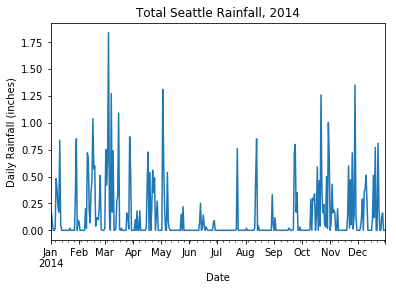

In [40]:
rain.plot()
plt.title('Total Seattle Rainfall, 2014')
plt.xlabel('Date')
plt.ylabel('Daily Rainfall (inches)')
plt.show()

The final info we need are the components of a `DatetimeIndex`.  At this point, we have a series (``rain``) with an index (``rain.index``) that is a structured ``DatetimeIndex`` object.  That object has several easily-accessible components, such as `week`, `month`, and `weekday` (see full list of components [here](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components)).  Among many other uses, we can use these components in `groupby` operations.

For example, we can group by ``rain.index.week`` to answer the question: "In each 7-day period, what was the total rainfall?" (from Hw7, Prob 3, Part 3)

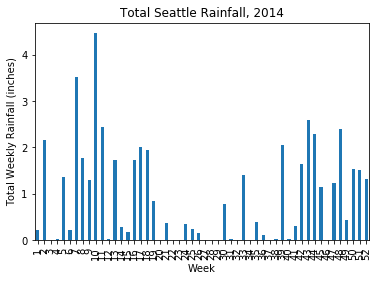

In [41]:
weekly_sum = rain.groupby(rain.index.week).sum()

weekly_sum.plot(kind='bar')
plt.title('Total Seattle Rainfall, 2014')
plt.xlabel('Week')
plt.ylabel('Total Weekly Rainfall (inches)')
plt.show()

## Questions

Answer each of these questions with a bar graph, using the `kind='bar'` parameter as shown in the example above.  The months and days can be labeled with either numbers (e.g, 0 through 6) or words (e.g, Sunday through Saturday).

**Part A:** What was the total rainfall per month?

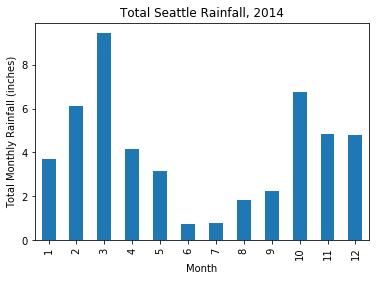

In [42]:
# Code your answer here
monthly_sum = rain.groupby(rain.index.month).sum()
monthly_sum.plot(kind='bar')
plt.title('Total Seattle Rainfall, 2014')
plt.xlabel('Month')
plt.ylabel('Total Monthly Rainfall (inches)')
plt.show()

**Part B:** For each day of the week, what was the ratio of rainy days (rain > 0 inches) to total days?  

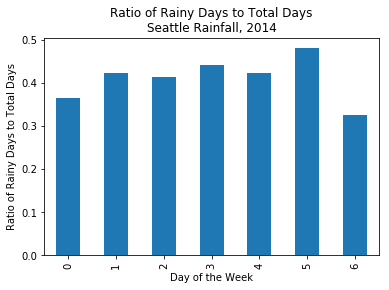

In [43]:
# Code your answer here
rainy = rain[rain > 0]
rainy_to_all = rainy.groupby(rainy.index.weekday).count()/rain.groupby(rain.index.weekday).count()
rainy_to_all.plot(kind='bar')
plt.title('Ratio of Rainy Days to Total Days\nSeattle Rainfall, 2014')
plt.xlabel('Day of the Week')
plt.ylabel('Ratio of Rainy Days to Total Days')
plt.show()

**Part C:** Consider only "rainy" days, for which rain > 0 inches.  For each day of the week, what was the median rainfall?  

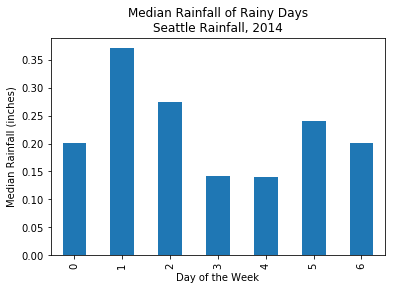

In [44]:
# Code your answer here
median_rainy = rainy.groupby(rainy.index.weekday).median()
median_rainy.plot(kind='bar')
plt.title('Median Rainfall of Rainy Days\nSeattle Rainfall, 2014')
plt.xlabel('Day of the Week')
plt.ylabel('Median Rainfall (inches)')
plt.show()